In [1]:
import pandas as pd
#Importing all required libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

#Plotting Plots
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
import pandas as pd
df = pd.read_csv("/Users/Arjun D H/Documents/breweries_dataset.csv",engine='python',encoding='utf-8')

In [3]:
df.head(5)

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [4]:
df.columns

Index(['Unnamed: 0', 'abv', 'ibu', 'id', 'name', 'style', 'brewery_id',
       'ounces'],
      dtype='object')

In [5]:
df.isnull().sum()

Unnamed: 0       0
abv             62
ibu           1005
id               0
name             0
style            5
brewery_id       0
ounces           0
dtype: int64

In [6]:
df.shape

(2410, 8)

In [7]:
name= df['name'].dropna()

In [8]:
name = name.tolist()

In [9]:
print(len(name))

2410


In [12]:
def findstyle(style):
    requiredstyle = []
    for i in style:
        if(style in i):
            requiredstyle.append(i)
    return(len(requiredstyle))  

In [14]:
findstyle("American Pale Ale")

0

In [15]:
top5style = df['style'].value_counts()
top5style[0:5]

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
Name: style, dtype: int64

In [16]:
top10style = df['style'].value_counts()
top10style[0:10]

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Name: style, dtype: int64

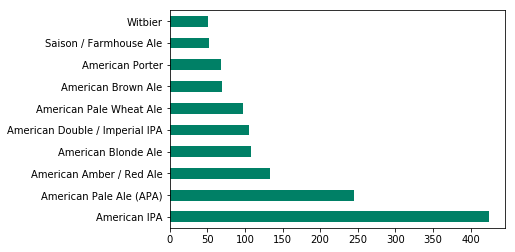

In [17]:
df['style'].value_counts()[:10].plot(kind='barh',colormap='summer')

In [18]:
top5brewery_id = df['brewery_id'].value_counts()
top5brewery_id = top5brewery_id[0:5]
print(type(top5brewery_id))

<class 'pandas.core.series.Series'>


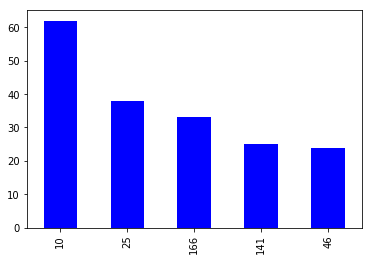

In [19]:
top5brewery_id.plot.bar(stacked=True, colormap='winter')

In [20]:
diffname= df['name'].dropna()

In [21]:
diffname.value_counts()

Nonstop Hef Hop                  12
Oktoberfest                       6
Dale's Pale Ale                   6
Longboard Island Lager            4
Boston Lager                      3
1327 Pod's ESB                    3
Dagger Falls IPA                  3
Grazias                           2
Point Oktoberfest                 2
Boxer                             2
Modus Hoperandi                   2
Heady Topper                      2
Shift                             2
Beach Blonde                      2
One Nut Brown                     2
Point the Way IPA                 2
Miner's Gold                      2
Plum St. Porter                   2
Pale Alement                      2
The Brown Note                    2
Slow Ride                         2
Citra Ass Down                    2
TailGate IPA                      2
Point Nude Beach Summer Wheat     2
The Deuce                         2
Point Special                     2
Brontide                          2
oSKAr the G'Rauch           

In [22]:
dfname = df['name'].value_counts()
dfname = dfname[0:10]

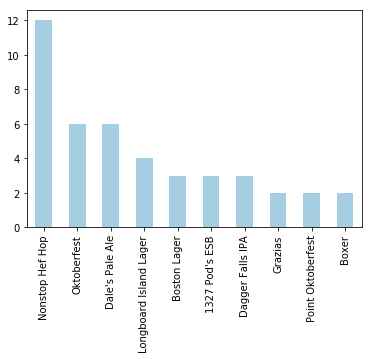

In [23]:
dfname.plot.bar(stacked=True, colormap='Paired')

# Analysis of  menus name Data

In [24]:
name = df['name'].dropna()

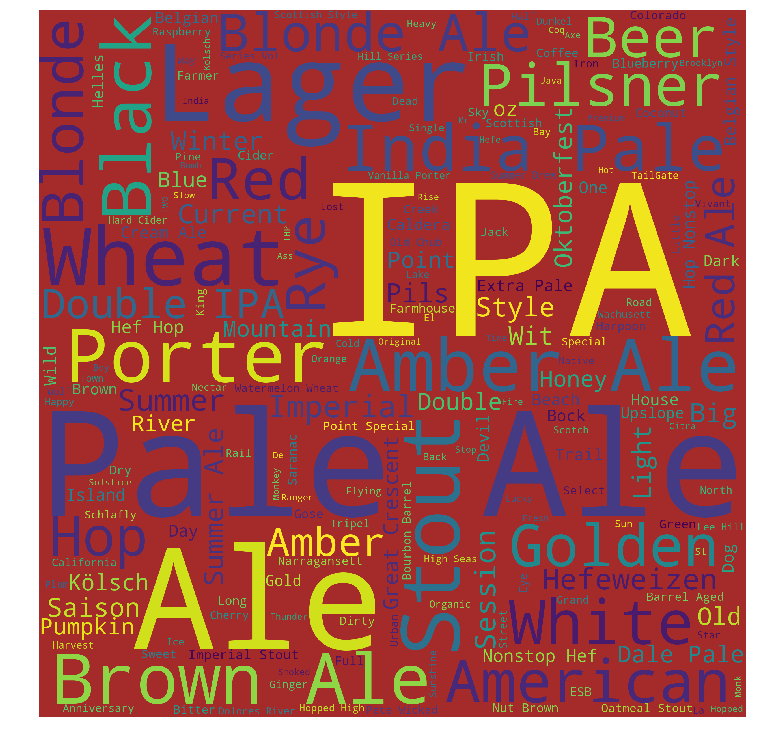

In [25]:
from wordcloud import WordCloud, STOPWORDS

def showWordCloud(data):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = 'brown',
                         width = 2500,
                         height = 2500
                         ).generate(cleaned_word)
    plt.figure(1,figsize = (13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

showWordCloud(name)

In [26]:
name = name.tolist()

In [27]:
# Prepare Stop Words
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [28]:
#Tokenize words and Clean up Text

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(name))

print(data_words[:1])

[['pub', 'beer']]


In [29]:
#Creating Bigram and Trigram models
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['pub', 'beer']


In [30]:
#Remove Stop words , Make Bigrams and Lemmatize
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [31]:
# Calling functions

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:4])

[['pub', 'beer'], ['devil', 'cup'], ['phoenix'], []]


In [32]:
# Create Dictionary and Corpus needed for Topic Modelling

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1)]]


In [33]:
id2word[0]

'beer'

In [34]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]

[[('beer', 1), ('pub', 1)], [('cup', 1), ('devil', 1)], [('phoenix', 1)]]

# Build LDA Model for  name Data

In [35]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [36]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.052*"porter" + 0.046*"style" + 0.014*"bock" + 0.014*"gold" + '
  '0.013*"berliner" + 0.012*"barrel" + 0.012*"king" + 0.011*"night" + '
  '0.011*"sun" + 0.011*"kolsch"'),
 (1,
  '0.388*"ale" + 0.049*"yard" + 0.048*"rail" + 0.031*"amber" + 0.018*"point" + '
  '0.017*"session" + 0.012*"light" + 0.011*"saison" + 0.010*"series" + '
  '0.009*"india"'),
 (2,
  '0.070*"beer" + 0.059*"wheat" + 0.049*"patty" + 0.045*"summer" + '
  '0.035*"pilsner" + 0.024*"pil" + 0.017*"hill" + 0.017*"hefeweizen" + '
  '0.013*"triangle" + 0.010*"apricot"'),
 (3,
  '0.292*"ipa" + 0.050*"mountain" + 0.025*"rye" + 0.014*"day" + 0.011*"slayer" '
  '+ 0.011*"wachusett" + 0.010*"island" + 0.008*"wolf" + 0.007*"monsta" + '
  '0.007*"road"'),
 (4,
  '0.105*"lager" + 0.077*"stout" + 0.050*"hop" + 0.048*"pumpkin" + '
  '0.043*"pale" + 0.037*"wynkoop" + 0.037*"oyster" + 0.019*"cider" + '
  '0.011*"apple" + 0.009*"bourbon_barrel"')]


In [37]:
# Compute Model Perplexity and Coherence Score

In [38]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.95199363202357

Coherence Score:  0.7151985979406753


In [39]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.323347 -0.014414       1        1  33.063114
3     -0.085987  0.163572       2        1  17.812641
4     -0.102687 -0.248477       3        1  17.436766
2     -0.071681  0.061388       4        1  16.018251
0     -0.062991  0.037930       5        1  15.669227, topic_info=     Category        Freq        Term       Total  loglift  logprob
71    Default  527.000000         ale  527.000000  30.0000  30.0000
38    Default  214.000000         ipa  214.000000  29.0000  29.0000
104   Default   76.000000       lager   76.000000  28.0000  28.0000
113   Default   55.000000       stout   55.000000  27.0000  27.0000
0     Default   46.000000        beer   46.000000  26.0000  26.0000
36    Default   39.000000       wheat   39.000000  25.0000  25.0000
1274  Default   67.000000        yard   67.000000  24.0000  24.0000
212   Default   65.000000        rail   65.000000  23.0000  23.0000
165   Default   37.000000    mountain   37.000000  22.0000  22.0000
26    Default   34.000000      porter   34.000000  21.0000  21.0000
44    Default   36.000000         hop   36.000000  20.0000  20.0000
161   Default   35.000000     pumpkin   35.000000  19.0000  19.0000
1404  Default   32.000000       patty   32.000000  18.0000  18.0000
27    Default   30.000000       style   30.000000  17.0000  17.0000
102   Default   30.000000      summer   30.000000  16.0000  16.0000
184   Default   31.000000        pale   31.000000  15.0000  15.0000
1405  Default   27.000000     wynkoop   27.000000  14.0000  14.0000
1406  Default   27.000000      oyster   27.000000  13.0000  13.0000
69    Default   42.000000       amber   42.000000  12.0000  12.0000
94    Default   23.000000     pilsner   23.000000  11.0000  11.0000
120   Default   19.000000         rye   19.000000  10.0000  10.0000
209   Default   16.000000         pil   16.000000   9.0000   9.0000
173   Default   25.000000       point   25.000000   8.0000   8.0000
440   Default   14.000000       cider   14.000000   7.0000   7.0000
381   Default   23.000000     session   23.000000   6.0000   6.0000
203   Default   12.000000        hill   12.000000   5.0000   5.0000
219   Default   11.000000  hefeweizen   11.000000   4.0000   4.0000
281   Default    9.000000        bock    9.000000   3.0000   3.0000
461   Default   10.000000         day   10.000000   2.0000   2.0000
118   Default    9.000000        gold    9.000000   1.0000   1.0000
...       ...         ...         ...         ...      ...      ...
26     Topic5   33.421322      porter   34.003815   1.8362  -2.9583
27     Topic5   29.664120       style   30.258587   1.8336  -3.0775
281    Topic5    9.321538        bock    9.904262   1.7928  -4.2351
118    Topic5    8.910583        gold    9.493558   1.7901  -4.2802
330    Topic5    7.941862      barrel    8.542641   1.7805  -4.3953
411    Topic5    7.533148        king    8.117963   1.7787  -4.4481
1117   Topic5    7.139307       night    7.721682   1.7751  -4.5018
931    Topic5    7.038709         sun    7.621340   1.7739  -4.5160
72     Topic5    8.418730    berliner    9.135503   1.7718  -4.3370
68     Topic5    6.856081      kolsch    7.440359   1.7717  -4.5423
147    Topic5    6.585248     vanilla    7.170137   1.7684  -4.5826
1144   Topic5    5.763846         cat    6.346189   1.7572  -4.7159
1267   Topic5    5.779160       sweat    6.363553   1.7571  -4.7132
1266   Topic5    5.779160     buffalo    6.363553   1.7571  -4.7132
424    Topic5    5.899141        brew    6.508489   1.7552  -4.6927
67     Topic5    5.384637       honey    5.969029   1.7504  -4.7839
301    Topic5    4.735676      dunkel    5.319267   1.7373  -4.9123
1160   Topic5    4.169861        bean    4.753755   1.7224  -5.0396
1225   Topic5    4.177288       alley    4.764845   1.7219  -5.0378
334    Topic5    4.174214      cherry    4.769195   1.7202  -5.0385
1012   Topic5    3.933019        chub    4.

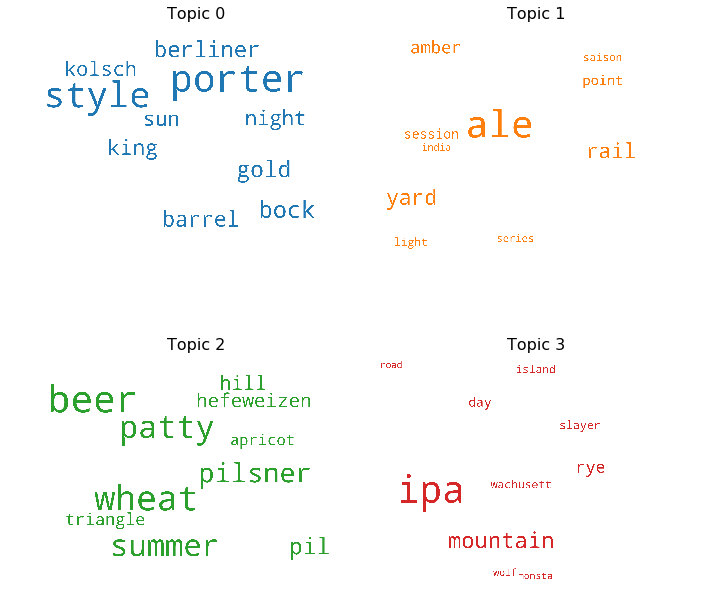

In [40]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Hyperparameter Tuning - Number of Topics and Alpha

In [41]:
# compute coherence value at various values of alpha and num_topics
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):
    
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))
        

    return model_list, coherence_values

In [42]:
# build models across a range of num_topics and alpha
num_topics_range = [2, 6, 10, 15, 20]
alpha_range = [0.01, 0.1, 0.001]
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        num_topics_range=num_topics_range, 
                                                        alpha_range=alpha_range)

In [43]:
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.010,2,0.654550
1,0.010,6,0.695411
2,0.010,10,0.715827
3,0.010,15,0.708060
4,0.010,20,0.711343
5,0.100,2,0.701192
6,0.100,6,0.701659
7,0.100,10,0.696202
8,0.100,15,0.717576
9,0.100,20,0.715689


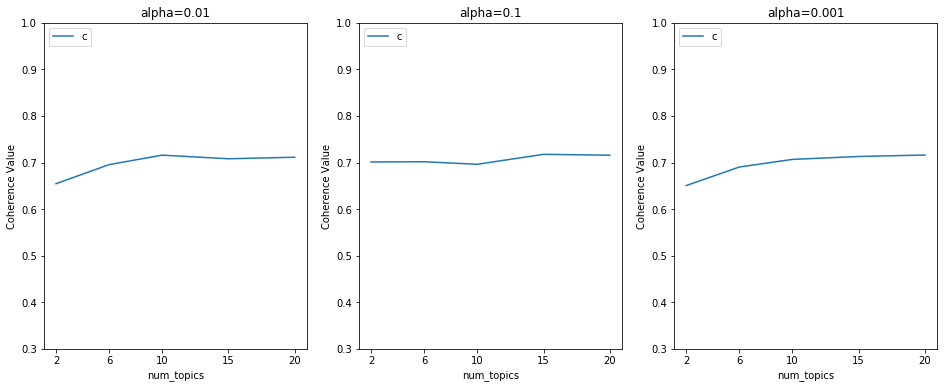

In [44]:
# plot
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))

    for i, val in enumerate(alpha_range):

        # subplot 1/3/i
        plt.subplot(1, 3, i+1)
        alpha_subset = coherence_df[coherence_df['alpha']==val]

        plt.plot(alpha_subset["num_topics"], alpha_subset["coherence_value"])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.30, 1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)

plot_coherence(coherence_df, alpha_range, num_topics_range)

In [45]:
# Build LDA model with alpha=0.1 and 10 topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.1,
                                           per_word_topics=True)

In [46]:
# print keywords 
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.668*"ale" + 0.082*"rail" + 0.052*"pumpkin" + 0.029*"session" + '
  '0.023*"rye" + 0.015*"india" + 0.011*"river" + 0.009*"cream" + '
  '0.006*"farmer" + 0.004*"farmhouse"'),
 (1,
  '0.062*"orange" + 0.049*"blood" + 0.001*"gose" + 0.001*"monk" + 0.001*"yard" '
  '+ 0.001*"patty" + 0.001*"cider" + 0.001*"hefeweizen" + 0.001*"wynkoop" + '
  '0.001*"oyster"'),
 (2,
  '0.008*"sky" + 0.001*"yard" + 0.001*"patty" + 0.001*"cider" + '
  '0.001*"wynkoop" + 0.001*"oyster" + 0.001*"hefeweizen" + 0.001*"light" + '
  '0.001*"apple" + 0.001*"bock"'),
 (3,
  '0.087*"island" + 0.030*"iron" + 0.027*"street" + 0.009*"lake" + '
  '0.003*"yeti" + 0.001*"shandy" + 0.001*"lighthouse" + 0.001*"sand" + '
  '0.001*"king" + 0.001*"longboard"'),
 (4,
  '0.280*"lager" + 0.132*"hop" + 0.130*"amber" + 0.114*"pale" + '
  '0.114*"mountain" + 0.008*"bomber" + 0.002*"dark" + 0.001*"apa" + '
  '0.000*"oyster" + 0.000*"squatter"'),
 (5,
  '0.648*"ipa" + 0.075*"point" + 0.031*"day" + 0.016*"dog" + 0.009*"bay" + '


In [47]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -15.122349352402274

Coherence Score:  0.6659911634889959


In [48]:
coherence_model_lda.get_coherence_per_topic()

[0.7002822808632672,
 0.7399276400526422,
 0.7652981464325811,
 0.5880670472979567,
 0.6663299415032562,
 0.7051430342422076,
 0.5770274639425609,
 0.7344476669610395,
 0.7244430537362284,
 0.637183227502185,
 0.611963731903923,
 0.6903388107580636,
 0.5398494894040774,
 0.6978976134417948,
 0.6116683042931534]

In [49]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.457222 -0.122319       1        1  17.963140
5     -0.087004  0.323172       2        1  10.732732
4     -0.075934  0.139751       3        1   8.697848
12     0.021633 -0.037993       4        1   6.865663
14     0.050878 -0.035631       5        1   6.147474
10     0.053147 -0.034099       6        1   5.884624
9      0.054966 -0.032703       7        1   5.525051
6      0.049949 -0.035893       8        1   5.323810
13     0.055995 -0.031118       9        1   5.251771
3      0.056613 -0.024309      10        1   5.005095
11     0.056806 -0.025126      11        1   4.741347
7      0.055739 -0.022290      12        1   4.586900
1      0.055919 -0.022705      13        1   4.462074
8      0.054698 -0.020135      14        1   4.443711
2      0.053815 -0.018602      15        1   4.368752, topic_info=     Category        Freq            Term       Total  loglift  logprob
71    Default  494.000000             ale  494.000000  30.0000  30.0000
38    Default  287.000000             ipa  287.000000  29.0000  29.0000
113   Default   98.000000           stout   98.000000  28.0000  28.0000
104   Default  101.000000           lager  101.000000  27.0000  27.0000
0     Default   76.000000            beer   76.000000  26.0000  26.0000
36    Default   78.000000           wheat   78.000000  25.0000  25.0000
102   Default   60.000000          summer   60.000000  24.0000  24.0000
26    Default   63.000000          porter   63.000000  23.0000  23.0000
94    Default   46.000000         pilsner   46.000000  22.0000  22.0000
44    Default   48.000000             hop   48.000000  21.0000  21.0000
27    Default   42.000000           style   42.000000  20.0000  20.0000
69    Default   47.000000           amber   47.000000  19.0000  19.0000
184   Default   42.000000            pale   42.000000  18.0000  18.0000
165   Default   41.000000        mountain   41.000000  17.0000  17.0000
209   Default   32.000000             pil   32.000000  16.0000  16.0000
212   Default   62.000000            rail   62.000000  15.0000  15.0000
14    Default   30.000000          saison   30.000000  14.0000  14.0000
49    Default   24.000000           beach   24.000000  13.0000  13.0000
173   Default   34.000000           point   34.000000  12.0000  12.0000
33    Default   19.000000          island   19.000000  11.0000  11.0000
161   Default   39.000000         pumpkin   39.000000  10.0000  10.0000
68    Default   16.000000          kolsch   16.000000   9.0000   9.0000
72    Default   14.000000        berliner   14.000000   8.0000   8.0000
117   Default   15.000000          winter   15.000000   7.0000   7.0000
108   Default   12.000000          orange   12.000000   6.0000   6.0000
424   Default   12.000000            brew   12.000000   5.0000   5.0000
147   Default   13.000000         vanilla   13.000000   4.0000   4.0000
45    Default   10.000000           blood   10.000000   3.0000   3.0000
330   Default   12.000000          barrel   12.000000   2.0000   2.0000
96    Default   10.000000            wolf   10.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
1377  Topic15    0.126685         wasatch    1.457386   0.6880  -7.2563
1376  Topic15    0.126685      devastator    1.457386   0.6880  -7.2563
1378  Topic15    0.126685          magick    1.457386   0.6880  -7.2563
1390  Topic15    0.126685     octoberfest    1.457386   0.6880  -7.2563
1380  Topic15    0.126685        pilzilla    1.457386   0.6880  -7.2563
1392  Topic15    0.126685          winkle    1.457386   0.6880  -7.2563
1384  Topic15    0.126685         starter    1.457386   0.6880  -7.2563
1386  Topic15    0.126685             ton    1.457386   0.6880  -7.2563
931   Topic15    0.126689             sun    1.457724   0.6878  -7.2563
687   Topic15    0.126691  bourbon_barrel    1.457990   0.6876  -7.2562
281   Topic15  

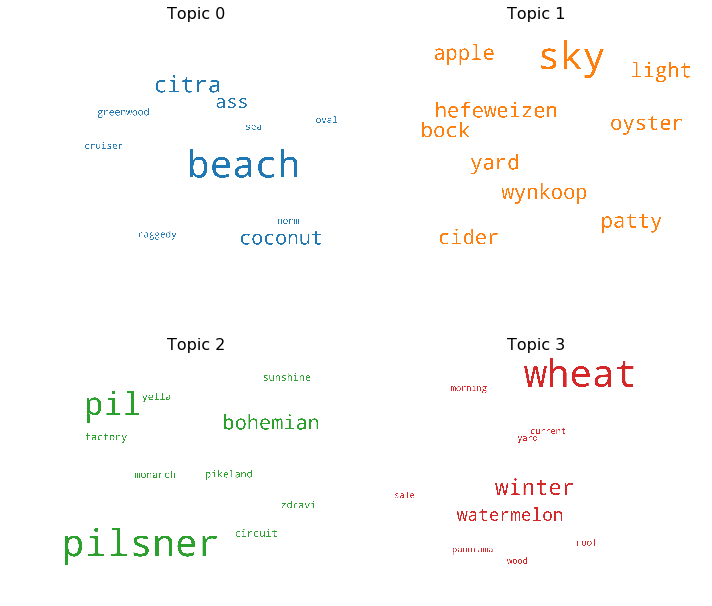

In [51]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()